<a href="https://colab.research.google.com/github/VindaShinde/DonorBrain/blob/master/Regression_train_test_cement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem
This Train file contains data on different batches of concrete containing different amounts of the ingredients of the concrete recipe. The ingredients (the X data) are:

Cement,
Blast Furnace Slag,
Fly Ash,
Water,
Superplasticizer,
Coarse Aggregate,
Fine Aggregate

In addition the data contains a field for the Age of the concrete, which could be a factor.

The y value to be predicted is the last column:  Compressive Strength.

 

Use the Training data to create a multivariate linear regression model. You can use the methods I showed you in Python, or use R.
Then use the Test data to make predictions ( y^ )about the strength of the Test batches.
Compare your predictions with the true y values in the y_concrete_strength_test.csv file.
How well would you say your model works?

Make a scatter plot your y^ (x-axis) versus the true y values (y-axis). If your model is accurate these should show a linear relationship.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x_testData = pd.read_csv("concrete_strength_test-1.csv")
trainData = pd.read_csv("concrete_strength_train.csv")
y_testData = pd.read_csv("y_concrete_strength_test.csv")['Compressive Strength']

In [ ]:
y_testData.head()

0    26.97
1    26.15
2    39.30
3    22.72
4    27.04
Name: Compressive Strength, dtype: float64

In [ ]:
cement_features = trainData.iloc[:,:-1]
#print(cement_features[:5])

cement_strength = trainData.iloc[:,-1]
print(cement_strength[:5])

0    26.92
1    52.01
2     8.49
3    33.09
4    11.58
Name: Compressive Strength, dtype: float64


In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(cement_features,cement_strength)

model.intercept_, model.coef_



(-19.43921135960464,
 array([-0.00468736,  0.1209828 ,  0.10685529,  0.08931185, -0.17161426,
         0.21693972,  0.02020416,  0.01935289,  0.11647834]))

In [ ]:
# Predict on test data
predicted_value = model.predict(x_testData)
predicted_value[:5]

array([29.3886812 , 30.33382688, 54.99203688, 28.26242805, 24.05013244])

Text(0.5, 1.0, 'y_test vs predicted_y')

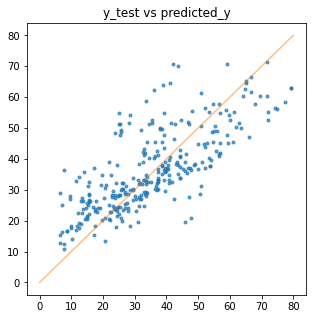

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(y_testData,predicted_value,'.', alpha=0.7)
xline=np.linspace(0,80)
plt.plot(xline, xline,'-', alpha=0.5)
plt.title('y_test vs predicted_y')

In [ ]:
type(predicted_value)

numpy.ndarray

# For better comaprison will use Stat models


In [ ]:
import statsmodels.api as sm

# adding the ones column, for the intercept w_0
cement_features_1 = sm.add_constant(cement_features) 

model_stat = sm.OLS(cement_strength, cement_features_1).fit()
model_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Compressive Strength   R-squared:                       0.635
Model:                              OLS   Adj. R-squared:                  0.630
Method:                   Least Squares   F-statistic:                     133.5
Date:                  Mon, 25 Oct 2021   Prob (F-statistic):          1.06e-144
Time:                          10:40:21   Log-Likelihood:                -2616.7
No. Observations:                   700   AIC:                             5253.
Df Residuals:                       690   BIC:                             5299.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -19.4392     33.477     -0.581      0.562     -85.169      46.290
Batch                 -0.0047      0.002     -2.438      0.015      -0.008      -0.001
Cement                 0.1210      0.010     11.569      0.000       0.100       0.142
Blast Furnace Slag     0.1069      0.012      8.591      0.000       0.082       0.131
Fly Ash                0.0893      0.015      5.870      0.000       0.059       0.119
Water                 -0.1716      0.051     -3.350      0.001      -0.272      -0.071
Superplasticizer       0.2169      0.113      1.924      0.055      -0.004       0.438
Coarse Aggregate       0.0202      0.012      1.695      0.090      -0.003       0.044
Fine Aggregate         0.0194      0.013      1.475      0.141      -0.006       0.045
Age                    0.1165      0.007     17.878      0.000       0.104       0.129
==============================================================================
Omnibus:                        2.226   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.092
Skew:                          -0.130   Prob(JB):                        0.351
Kurtosis:                       3.067   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Check the model on test data

x_testData_1 = sm.add_constant(x_testData)
y_predicted = model_stat.predict(x_testData_1)
y_predicted[:5]


0    29.388681
1    30.333827
2    54.992037
3    28.262428
4    24.050132
dtype: float64

Text(0.5, 1.0, 'y_test vs predicted_y')

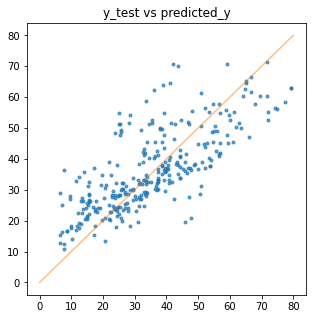

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(y_testData,y_predicted,'.', alpha=0.7)
xline=np.linspace(0,80)
plt.plot(xline, xline,'-', alpha=0.5)
plt.title('y_test vs predicted_y')

In [ ]:
wo_w1_values = pd.concat([model_stat.params, model_stat.bse, model_stat.pvalues], axis=1) 
wo_w1_values.columns = ['W-values', 'SD', 'P-value']
wo_w1_values

,W-values,SD,P-value
const,-19.439211,33.477144,5.616517e-01
Batch,-0.004687,0.001922,1.501358e-02
Cement,0.120983,0.010458,2.047412e-28
Blast Furnace Slag,0.106855,0.012438,5.722358e-17
Fly Ash,0.089312,0.015216,6.784186e-09
Water,-0.171614,0.051222,8.509694e-04
Superplasticizer,0.216940,0.112732,5.471799e-02
Coarse Aggregate,0.020204,0.011918,9.046350e-02
Fine Aggregate,0.019353,0.013122,1.406962e-01
Age,0.116478,0.006515,5.002141e-59


In [ ]:
#New model as the batch, Coarse Aggregate and Fine Aggregate are almost close to 0 

New_model_stat = sm.OLS(cement_strength, cement_features[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Age']]).fit()
New_model_stat.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Compressive Strength   R-squared (uncentered):                   0.930
Model:                              OLS   Adj. R-squared (uncentered):              0.929
Method:                   Least Squares   F-statistic:                              1528.
Date:                  Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                          10:40:21   Log-Likelihood:                         -2642.7
No. Observations:                   700   AIC:                                      5297.
Df Residuals:                       694   BIC:                                      5325.
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cement                 0.1152      0.005     22.505      0.000       0.105       0.125
Blast Furnace Slag     0.0908      0.006     14.742      0.000       0.079       0.103
Fly Ash                0.0800      0.009      8.522      0.000       0.062       0.098
Water                 -0.0872      0.010     -8.573      0.000      -0.107      -0.067
Superplasticizer       0.4841      0.089      5.460      0.000       0.310       0.658
Age                    0.1091      0.007     16.475      0.000       0.096       0.122
==============================================================================
Omnibus:                        1.299   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.149
Skew:                          -0.044   Prob(JB):                        0.563
Kurtosis:                       3.178   Cond. No.                         80.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predicted_y_new = New_model_stat.predict(x_testData_1[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Age']])

Text(0.5, 1.0, 'y_test vs predicted_y_new')

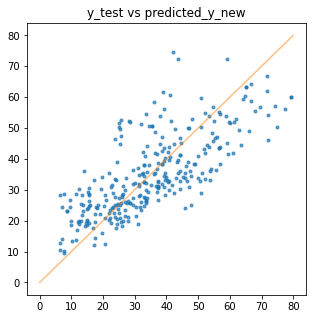

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(y_testData,predicted_y_new,'.', alpha=0.7)
xline=np.linspace(0,80)
plt.plot(xline, xline,'-', alpha=0.5)
plt.title('y_test vs predicted_y_new')

In [ ]:
# To find more

New_model_stat_2 = sm.OLS(cement_strength, cement_features[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age']]).fit()
New_model_stat_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Compressive Strength   R-squared (uncentered):                   0.927
Model:                              OLS   Adj. R-squared (uncentered):              0.926
Method:                   Least Squares   F-statistic:                              1754.
Date:                  Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                          10:40:22   Log-Likelihood:                         -2657.4
No. Observations:                   700   AIC:                                      5325.
Df Residuals:                       695   BIC:                                      5348.
Df Model:                             5                                                  
Covariance Type:              nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cement                 0.1333      0.004     33.440      0.000       0.125       0.141
Blast Furnace Slag     0.1084      0.005     20.206      0.000       0.098       0.119
Fly Ash                0.1141      0.007     15.948      0.000       0.100       0.128
Water                 -0.1153      0.009    -12.896      0.000      -0.133      -0.098
Age                    0.1069      0.007     15.847      0.000       0.094       0.120
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.751
Skew:                          -0.090   Prob(JB):                        0.253
Kurtosis:                       3.248   Cond. No.                         10.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

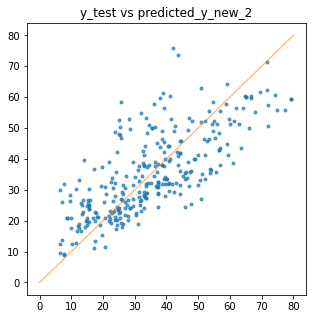

In [ ]:
predicted_y_new_2 = New_model_stat_2.predict(x_testData_1[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age']])

plt.figure(figsize=(5,5))

plt.plot(y_testData,predicted_y_new_2,'.', alpha=0.7)
xline=np.linspace(0,80)
plt.plot(xline, xline,'-', alpha=0.5)
plt.title('y_test vs predicted_y_new_2')

##################### PLOT IN PNG  #################################
plt.savefig('plot_in_png.png', dpi=300, bbox_inches='tight')


After comapring all the models with list of diffrent features,
Model 2 and Model 3 are almost similar and better than model 1.